In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

# Rysowanie kształtów
### Rysowanie prostej

Aby narysować linię, musisz podać współrzędne początkowe i końcowe linii. Utwórzmy czarny obrazek i narysujemy na nim niebieską linię od lewego górnego do prawego dolnego rogu. Wykorzystamy do tego metodę __cv2.line()__. Przyjmuje ona trzy argumenty:
- Obraz źródłowy
- Kolor linii w formacie RGB
- Grubość linii w pikselach.

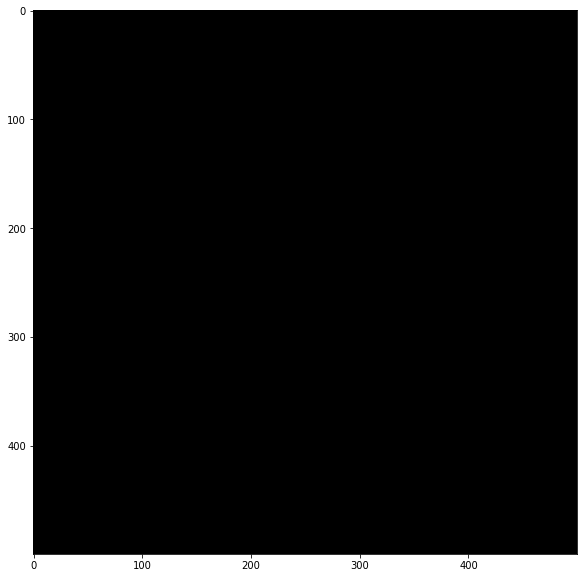

In [49]:
image = np.zeros((500, 500, 3), np.uint8)
plt.imshow(image)

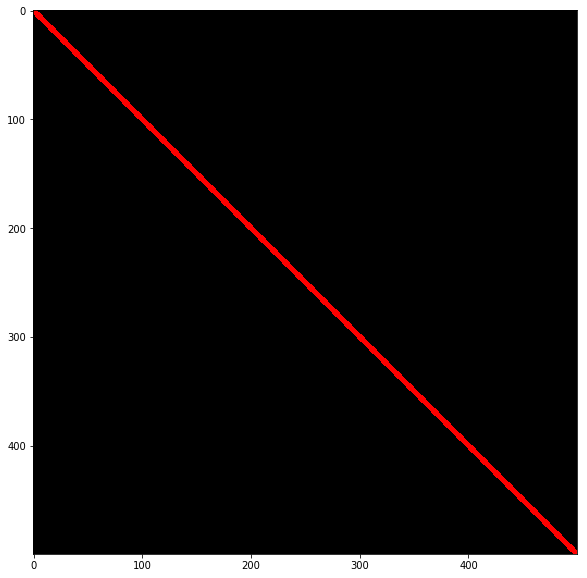

In [50]:
cv2.line(image, (0,0), (499, 499), (255, 0, 0), 4)
plt.imshow(image)

### Rysowanie prostokąta
Do narysowania prostokąta potrzebny jest lewy górny róg i prawy dolny róg prostokąta. Tym razem narysujemy zielony prostokąt w prawym górnym rogu obrazu.

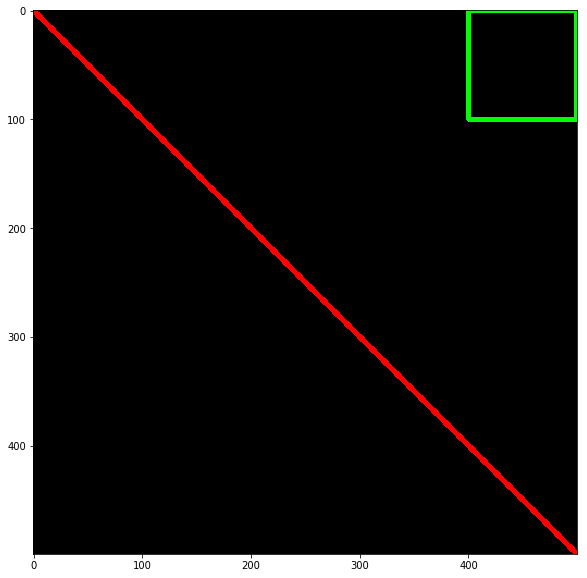

In [51]:
cv2.rectangle(image, (400,0), (499,100),(0,255,0), 3)
plt.imshow(image)

Aby narysować okrąg, potrzebujesz jego współrzędnych środkowych i promienia. Narysujemy okrąg wewnątrz prostokąta narysowanego powyżej.

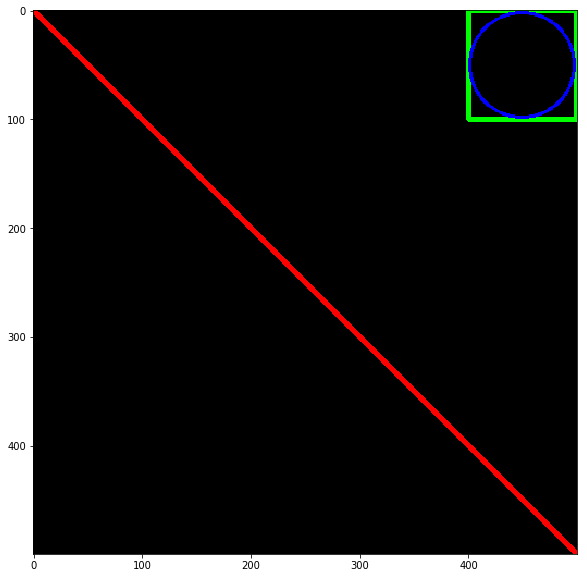

In [52]:
cv2.circle(image,(449, 50), 48, (0,0,255), 2)
plt.imshow(image)

### Rysunk wielokąta
Aby narysować wielokąt, najpierw potrzebujesz współrzędnych wierzchołków. Zrób z tych punktów tablicę kształtu ROWSx1x2, gdzie ROWS są liczbą wierzchołków i powinny być typu int32. Tutaj narysujemy mały wielokąt z czterema wierzchołkami w kolorze żółtym.

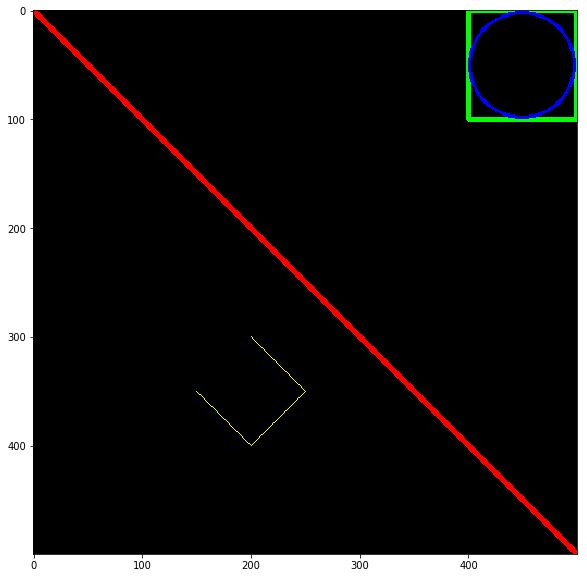

In [53]:
pts = np.array([[200, 300], [250,350], [200,400], [150,350]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(image, [pts], False, (255,255,0), 1)
plt.imshow(image)

Jeśli trzecim argumentem jest False, otrzymasz linie łączące wszystkie punkty, a nie zamknięty kształt.

cv2.polylines() może być użyty do narysowania wielu linii. Wystarczy utworzyć listę wszystkich linii, które chcesz narysować i przekazać ją funkcji. Wszystkie linie zostaną narysowane indywidualnie. Jest to znacznie lepszy i szybszy sposób na narysowanie grupy linii niż wywołanie cv.line() dla każdej linii. Gdy zmienimy wartość trzecirgo argumentu na True, otrzymamy zamknięty kształt

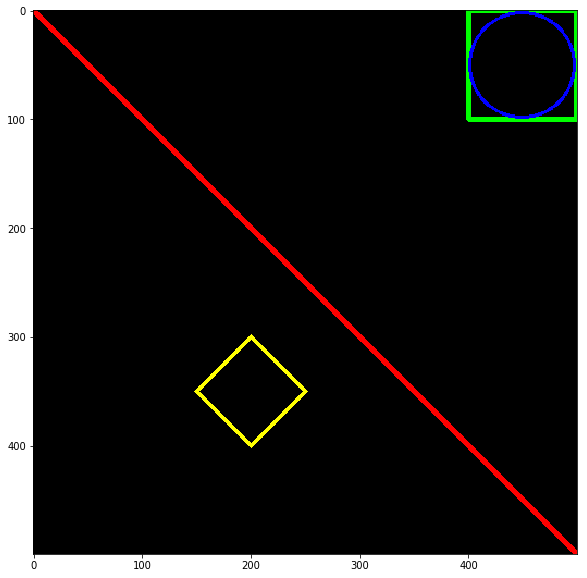

In [54]:
cv2.polylines(image, [pts], True, (255,255,0), 3)
plt.imshow(image)

### Nakładanie tekstu
Aby umieścić teksty w obrazach korzystamy z funkcji __putText__ z parametrami:

- Tekst, który chcesz zapisać
- Współrzędne pozycji w miejscu, w którym chcesz je umieścić (tj. w lewym dolnym rogu pola tekstowego).
- Typ czcionki 
- Skala czcionki (określa wielkość czcionki)
- regularne rzeczy, takie jak kolor, grubość, typ linii itp. Dla lepszego wyglądu zalecany jest  lineType = cv.LINE_AAA.

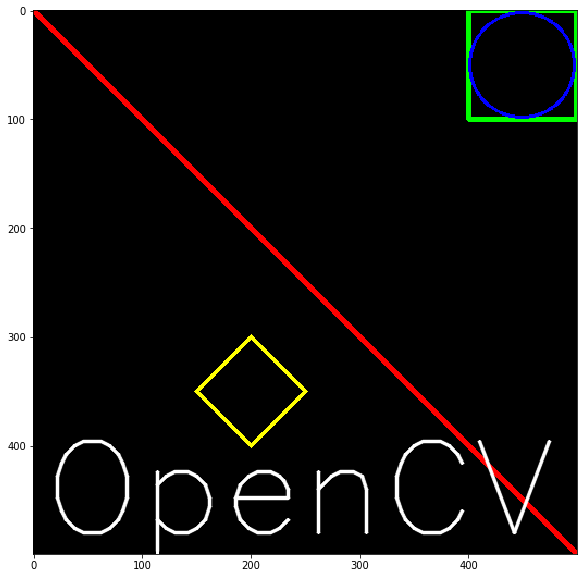

In [57]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image,'OpenCV', (10,480), font, 4, (255,255,255), 2, cv2.LINE_AA)
plt.imshow(image)

### Zadanie 1
Utwórz biały pusty obraz o wymiarach 300 x 300

### Zadanie 2
Narysuj __pionową__ prostą czarną prostą zaczynając od 50px z lewej strony co 100px o grubości 2px

### Zadanie 3
Narysuj żółty okrąg na środku obrazu o promieniu 30 i grubości linii 3px

### Zadanie 4
Dodaj napis o treści "Python AGH" w lewym dolnym rogu. Dobierz grubość, kolor i wielkość czcionki tak, zby był czytelny.

### Zadanie 5
Narysuj w dowolnym miejscu sześciokąt foremny, żeby był widoczny wykorzystując funkcję cv2.polylines